In [39]:
#import cleaned dataset
import pandas as pd
import os as os
wd = os.getcwd()

orth = pd.read_csv(wd + "\clean_model_normalized.csv")

In [40]:
#creation of train and test datasets
from sklearn.model_selection import train_test_split

X = orth.drop(['Retained','Departure_Date','Return_Date','Deposit_Date','subjectivity','neg','neu','pos','compound'], axis = 1)
y = orth['Retained']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=10032021)

In [41]:
#create model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_test, y_test)
y_pred = model.predict(x_test)

In [42]:
#print model metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

[[363   6]
 [  3 531]]
***RESULTS ON TEST SET***
f1_score:  0.9915966386554622


In [43]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

classifier = GradientBoostingClassifier()
parameters = {'loss': ['deviance','exponential'], 
              'learning_rate': [0.1,0.2,0.3],
              #'n_estimators': [20,50,100,300],
              'subsample': [1.0,0.8],
               #'criterion':['friedman_mse', 'mse', 'mae'],
               'min_samples_split': [5,100,200],
               'min_samples_leaf': [2,4,10]
             }

#DEFINE GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
                  
#TRAIN 
gridsearch = gridsearch.fit(x_train, y_train)
                  
#Results of your GRIDSEARCH
print('***GRIDSEARCH FINAL RESULTS***')

print("Best score: %f using %s" % (gridsearch.best_score_, gridsearch.best_params_))
means = gridsearch.cv_results_['mean_test_score']
stds = gridsearch.cv_results_['std_test_score']
params = gridsearch.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
***GRIDSEARCH FINAL RESULTS***
Best score: 0.932611 using {'learning_rate': 0.2, 'loss': 'exponential', 'min_samples_leaf': 2, 'min_samples_split': 200, 'subsample': 1.0}
0.929140 (0.007229) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 5, 'subsample': 1.0}
0.931260 (0.007183) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 5, 'subsample': 0.8}
0.929267 (0.008874) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 100, 'subsample': 1.0}
0.928096 (0.008281) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 100, 'subsample': 0.8}
0.928896 (0.008059) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 200, 'subsample': 1.0}
0.927507 (0.008619) with: {'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 2

In [44]:
#winner - f1: 0.809904 (0.005402) with: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
#TEST ON YOUR TEST SET 
winner_model = gridsearch.best_estimator_
winner_model.fit(x_train, y_train)
print(gridsearch.best_params_)
y_pred = winner_model.predict(x_test)
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


{'learning_rate': 0.2, 'loss': 'exponential', 'min_samples_leaf': 2, 'min_samples_split': 200, 'subsample': 1.0}
***RESULTS ON TEST SET***
f1_score:  0.9452181987000929
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       369
           1       0.94      0.95      0.95       534

    accuracy                           0.93       903
   macro avg       0.93      0.93      0.93       903
weighted avg       0.93      0.93      0.93       903

[[335  34]
 [ 25 509]]


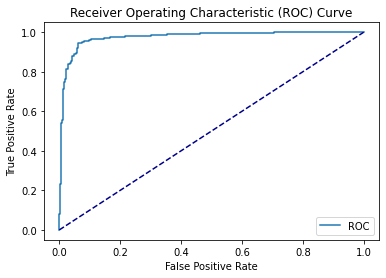

AUC: 0.97


In [45]:
# ROC Curve of winner model {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
#from sklearn import metrics
#model = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2, min_samples_split=5)
winner_model.fit(x_train, y_train)
y_pred_1 = winner_model.predict(x_test)

y_probs = winner_model.predict_proba(x_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [46]:
#analyzing obtained tree
x_train.columns.tolist()

['Unnamed: 0',
 'From_Grade',
 'To_Grade',
 'Days',
 'Cancelled_Pax',
 'Total_Discount_Pax',
 'FPP',
 'Total_Pax',
 'FPP_to_School_enrollment',
 'ID',
 'Tuition',
 'FRP_Active',
 'FRP_Cancelled',
 'FRP_Take_up_percent_',
 'EZ_Pay_Take_Up_Rate',
 'School_Sponsor',
 'SPR_Group_Revenue',
 'FPP_to_PAX',
 'Num_of_Non_FPP_PAX',
 'Poverty_Code',
 'CRM_Segment',
 'Parent_Meeting_Flag',
 'MDR_High_Grade',
 'Total_School_Enrollment',
 'Income_Level',
 'SPR_New_Existing',
 'NumberOfMeetingswithParents',
 'DifferenceTraveltoFirstMeeting',
 'DifferenceTraveltoLastMeeting',
 'polarity',
 'Is_Region_Dallas',
 'Is_Region_Houston',
 'Is_Region_Northern California',
 'Is_Region_Other',
 'Is_Region_Pacific Northwest',
 'Is_Region_Southern California',
 'Is_School_Type_CHD',
 'Is_School_Type_PUBLIC',
 'Is_SPR_Product_Type_CA History',
 'Is_SPR_Product_Type_Costa Rica',
 'Is_SPR_Product_Type_East Coast',
 'Is_SPR_Product_Type_IL History',
 'Is_SPR_Product_Type_International',
 'Is_SPR_Product_Type_Science'

In [47]:
#select top features to explain 'retained' field target
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k= 1)
fs.fit(x_train, y_train)
df_fs = pd.DataFrame(data = fs.scores_,  columns=["SCORES"])
df_fs['Features'] = x_train.columns
print(df_fs.sort_values(ascending=False, by=['SCORES'])[0:50])

         SCORES                           Features
29   952.938481                           polarity
11   158.543926                         FRP_Active
7    125.597499                          Total_Pax
6    122.716189                                FPP
129  112.299794        Is_SchoolGradeTypeHigh_High
93   111.590275         Is_GroupGradeTypeHigh_High
18    86.739202                 Num_of_Non_FPP_PAX
94    83.224833       Is_GroupGradeTypeHigh_Middle
5     83.095840                 Total_Discount_Pax
125   81.361571         Is_SchoolGradeTypeLow_High
130   69.860567      Is_SchoolGradeTypeHigh_Middle
134   68.914350           Is_SchoolSizeIndicator_S
145   64.103316                 Is_MDR_Low_Grade_9
142   58.413011                 Is_MDR_Low_Grade_6
126   54.319637       Is_SchoolGradeTypeLow_Middle
22    50.219043                     MDR_High_Grade
24    47.621942                       Income_Level
17    44.616945                         FPP_to_PAX
95    35.738135              Is

d:\projects\jupiter\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [53 91] are constant.
  UserWarning)
d:\projects\jupiter\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [48]:
#order some features per target correlation
x_train['Retained'] = y_train
print(x_train.corr()['Retained'].abs().sort_values(ascending=False).head(30))

Retained                          1.000000
polarity                          0.558328
FRP_Active                        0.264714
Total_Pax                         0.237343
FPP                               0.234757
Is_SchoolGradeTypeHigh_High       0.225100
Is_GroupGradeTypeHigh_High        0.224424
Num_of_Non_FPP_PAX                0.198981
Is_GroupGradeTypeHigh_Middle      0.195065
Total_Discount_Pax                0.194920
Is_SchoolGradeTypeLow_High        0.192951
Is_SchoolGradeTypeHigh_Middle     0.179267
Is_SchoolSizeIndicator_S          0.178088
Is_MDR_Low_Grade_9                0.171949
Is_MDR_Low_Grade_6                0.164356
Is_SchoolGradeTypeLow_Middle      0.158643
MDR_High_Grade                    0.152683
Income_Level                      0.148772
FPP_to_PAX                        0.144102
Is_MajorProgramCode_H             0.129237
Is_SPR_Product_Type_East Coast    0.127399
Is_Travel_Type_A                  0.127087
Is_Travel_Type_T                  0.126768
SPR_Group_R

d:\projects\jupiter\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
